In [7]:
# import packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('CIE_SEE.csv')
df

,CIE,SEE
0,10,51
1,10,11
2,10,13
3,10,21
4,11,36
...,...,...
82,24,48
83,24,76
84,24,48
85,25,74


In [10]:
# dropping rows which have null values
df.dropna(inplace=True,axis=0)
df

,CIE,SEE
0,10,51
1,10,11
2,10,13
3,10,21
4,11,36
...,...,...
82,24,48
83,24,76
84,24,48
85,25,74


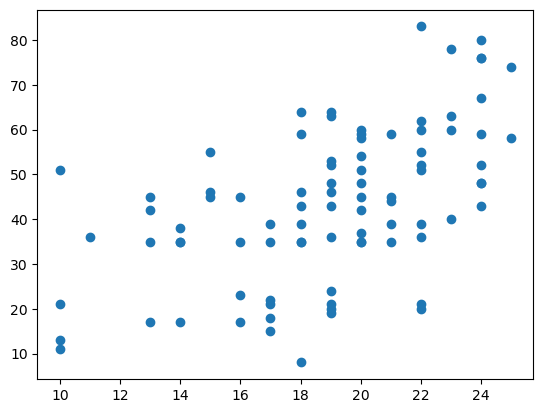

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['CIE'],df['SEE'])

<AxesSubplot:>

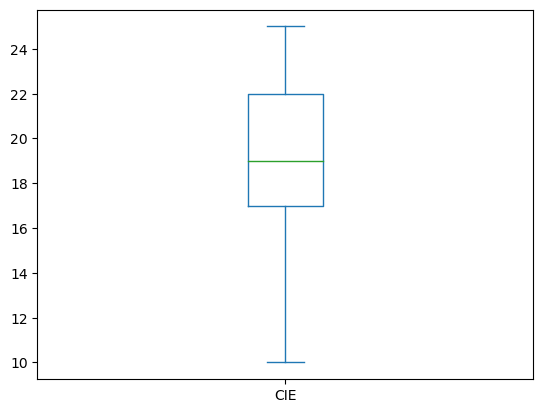

In [12]:
df['CIE'].plot(kind='box')

In [17]:
# finding the 1st quartile
q1 = df["CIE"].quantile(0.25)

# finding the 3rd quartile
q3 = df['CIE'].quantile(0.75)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)


In [18]:
upperIndex = df[df['CIE']>upper_bound].index
df.drop(upperIndex,inplace=True)
lowerIndex = df[df['CIE']<lower_bound].index
df.drop(lowerIndex,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CIE     87 non-null     int64
 1   SEE     87 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


<AxesSubplot:>

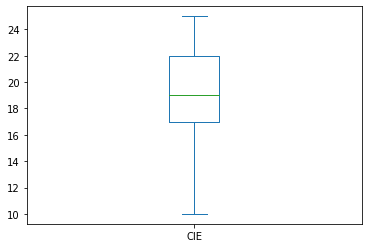

In [19]:
df['CIE'].plot(kind='box')

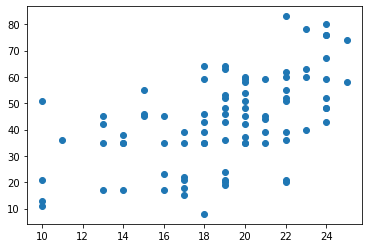

In [20]:
plt.scatter(df['CIE'],df['SEE'])

In [13]:
y = df['SEE']
X = df.drop('SEE',axis=1)

In [14]:
# splitting the dataframe into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)


In [17]:
y_pred = model.predict(X_test)
ydf = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rslt_df = ydf.sort_values(by = 'y_test')


In [18]:
print(mean_squared_error(y_test,y_pred))

217.8727442394029


In [19]:
print(r2_score(y_test, y_pred))

0.24205337791801207


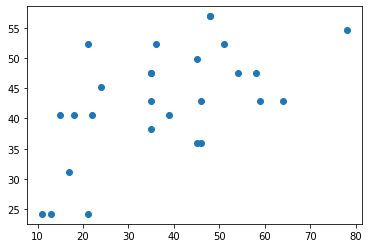

In [30]:
import matplotlib.pyplot as plt
plt.scatter(ydf['y_test'],ydf['y_pred'])

In [31]:
# adjusted R-squared
adjR2= 1 - ( 1-model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
adjR2

C:\Users\YASH\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-91.56187423900647